# 1.資料清理與視覺化圖表
### (1)清理遺漏值:

* 匯入所需函式庫

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* 匯入資料並檢查有無遺漏值

In [2]:
#偵測遺漏值
df = pd.read_csv('HW2_heart.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

結果顯示此資料集並無遺漏值

### (2)視覺化圖表
#####  A.利用直方圖顯示各區間靜止血壓人數

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


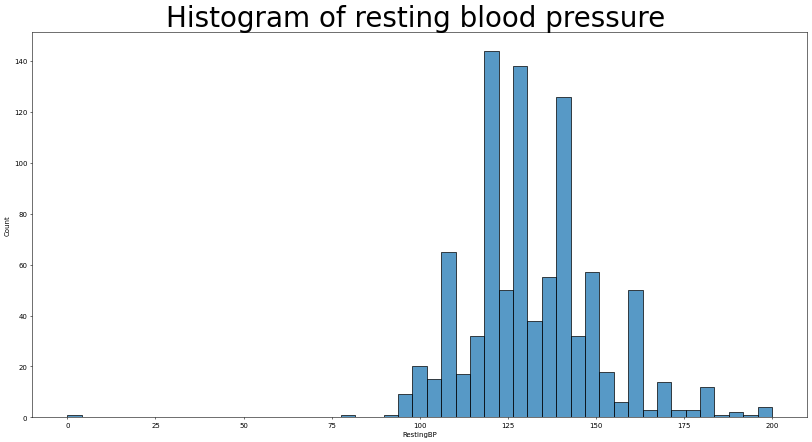

In [3]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.RestingBP)
plt.title("Histogram of resting blood pressure ",fontsize=40)
plt.show()

從上方圖可觀察出此數據有一些極度偏離正常值的數據
因此我們可以嘗試用四分位數區間來將那些離群值剃除於數據外

##### 刪除離群值並觀察直方圖
為了一些極端資料及雜訊影響模型的擬合後效能，因此在此階段我們要先將這些資料移除<br>
首先要先檢查離群值是否存在:

In [4]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['RestingBP'])[0]
df.take(idx)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


檢查後發現離群值確實存在<br>
接下來便需要將這些離群值移除

In [5]:
#找出離群值的row
idx = outlier_idx(df['RestingBP'])[0]
#移除離群值
df=df.drop(idx)
#顯示移除後的資料
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

在移除離群值後再次觀察此數據的直方圖:

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


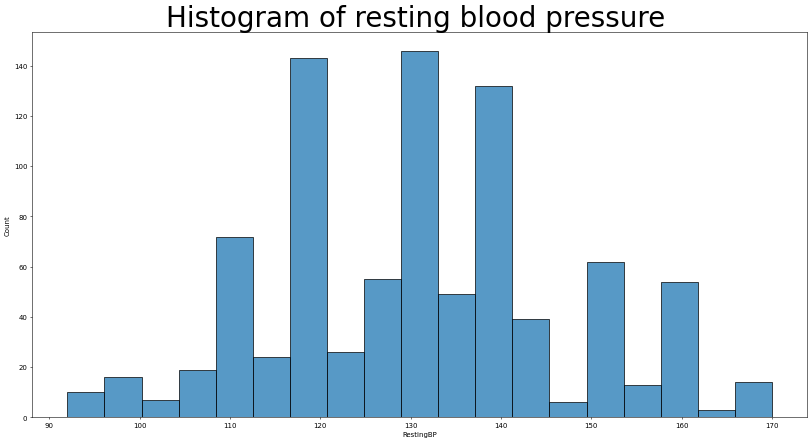

In [6]:
#畫出移除離群值後資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.RestingBP)
plt.title("Histogram of resting blood pressure ",fontsize=40)
plt.show()

由此圖可觀察到數據更為集中其中極為極端的數直接從數據中被移除，並且數值跨度也小了許多，應能對後續模型建立起到幫助

#####  B.利用直方圖顯示各區間Cholesterol

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


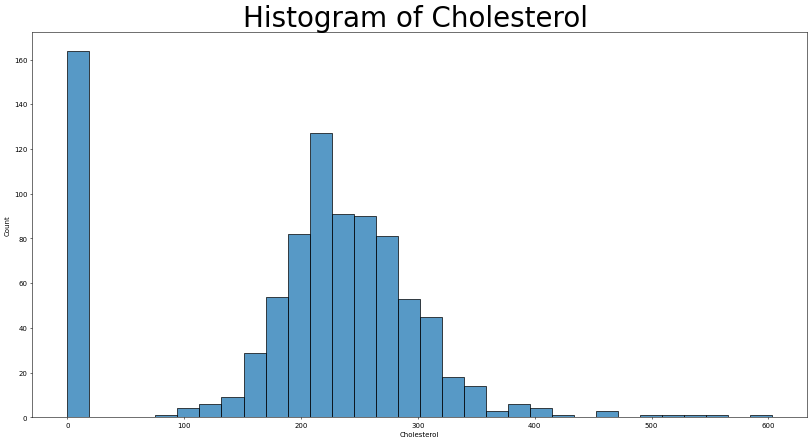

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [7]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Cholesterol)
plt.title("Histogram of Cholesterol ",fontsize=40)
plt.show()
print(df)

從上面可以發現有100多人的膽固醇含量為0明顯不合理，因此我們將這些不合理的數值去除後再進行觀察

標籤索引： Index([ 28,  30,  69,  76, 103, 149, 182, 250, 293, 294,
       ...
       508, 514, 515, 518, 535, 536, 616, 624, 667, 796],
      dtype='int64', length=177)
刪除離群值後的數據框：
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0  

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


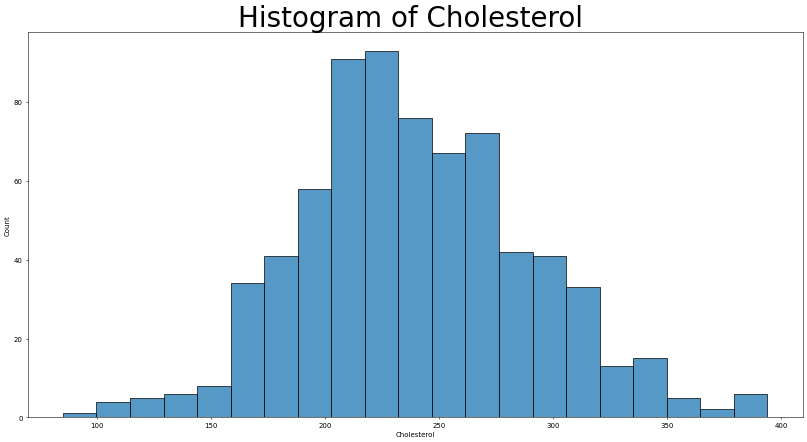

In [8]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['Cholesterol'])[0]
df.take(idx)
labels = df.index[idx]
print("標籤索引：", labels)

# 使用 drop 方法刪除離群值
df = df.drop(labels)
print("刪除離群值後的數據框：")
print(df)
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Cholesterol)
plt.title("Histogram of Cholesterol ",fontsize=40)
plt.show()

#####  C.利用直方圖顯示各區間MaxHR

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


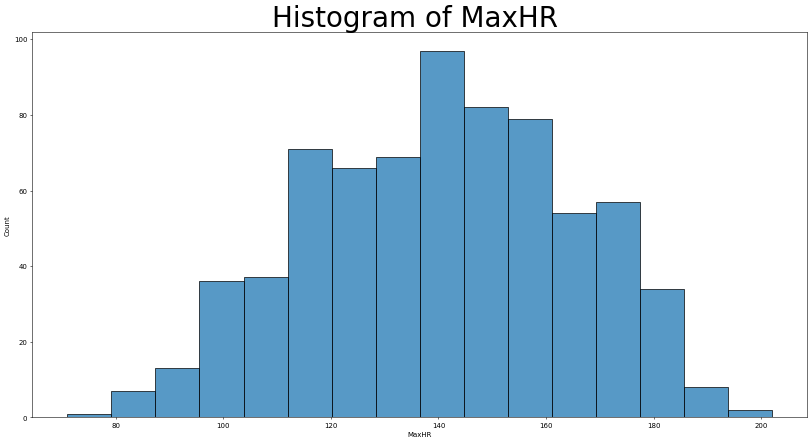

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [9]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.MaxHR)
plt.title("Histogram of MaxHR ",fontsize=40)
plt.show()
print(df)

檢查是否有離群值

In [10]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['MaxHR'])[0]
df.take(idx)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


結果並沒有發現離群值，因此不用刪除

#####  D.利用直方圖顯示各區間Oldpeak

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


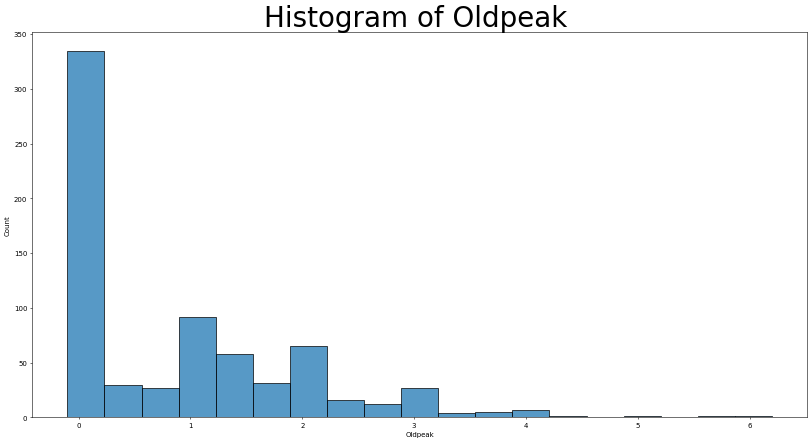

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [11]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Oldpeak)
plt.title("Histogram of Oldpeak ",fontsize=40)
plt.show()
print(df)

In [12]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['Oldpeak'])[0]
df.take(idx)
labels = df.index[idx]
print("標籤索引：", labels)

# 使用 drop 方法刪除離群值
df = df.drop(labels)
print("刪除離群值後的數據框：")
print(df)


標籤索引： Index([68, 166, 500, 521, 537, 559, 771, 775, 791, 850, 900, 908], dtype='int64')
刪除離群值後的數據框：
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0   

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


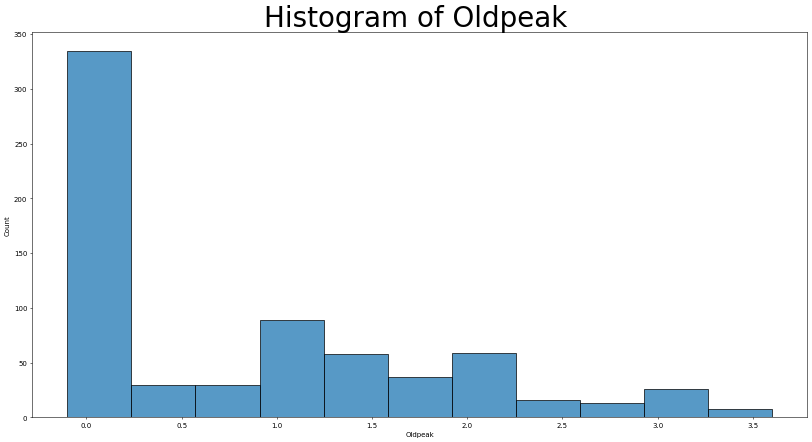

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [13]:
#畫出刪除後的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Oldpeak)
plt.title("Histogram of Oldpeak ",fontsize=40)
plt.show()
print(df)

#####  D.利用直方圖顯示各區間Age

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


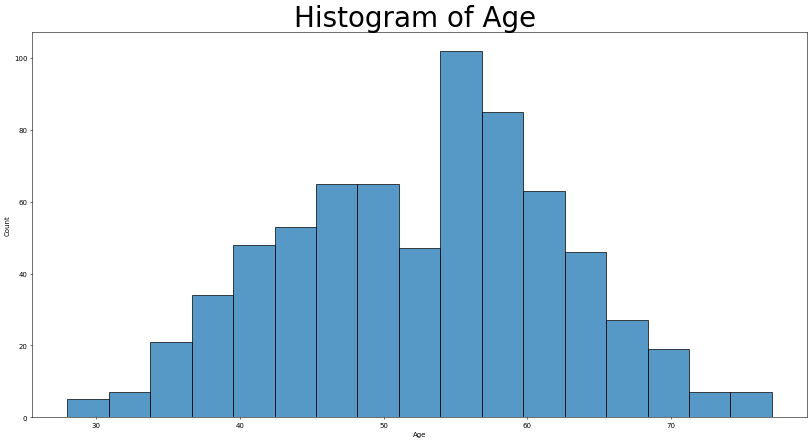

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [14]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Age)
plt.title("Histogram of Age ",fontsize=40)
plt.show()
print(df)

In [15]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['Oldpeak'])[0]
df.take(idx)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [16]:
labels = df.index[idx]
print("標籤索引：", labels)

# 使用 drop 方法刪除離群值
df = df.drop(labels)
print("刪除離群值後的數據框：")
print(df)

標籤索引： Index([], dtype='int64')
刪除離群值後的數據框：
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope 

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


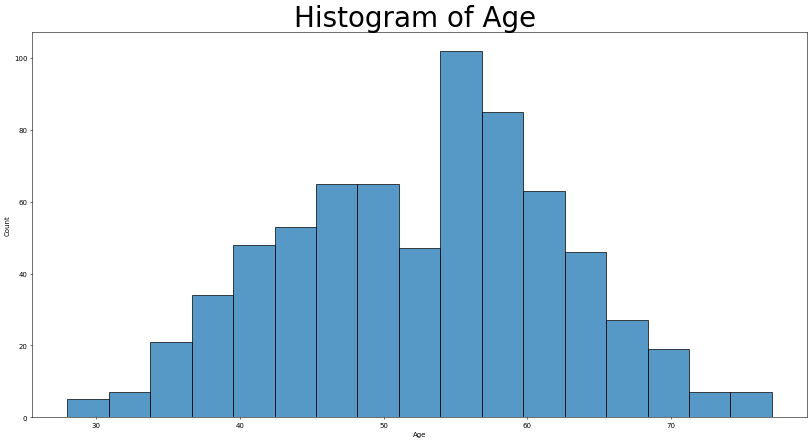

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [17]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.Age)
plt.title("Histogram of Age ",fontsize=40)
plt.show()
print(df)

# 2.敘述性統計分析
在進行統計分析前先將某些特徵轉為數值型:


In [18]:
# 將非數值數據轉換為數值v
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df['FastingBS'] = df['FastingBS'].map({0: 0, 1: 1})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 2, 'Flat': 1, 'Down': 0})

# 輸出轉換後的數據框
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1        140          289          0           0   
1   49    1              2        160          180          0           0   
2   37    0              1        130          283          0           1   
3   48    1              3        138          214          0           0   
4   54    0              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


透過敘述性統計分析來了解數據所具有之特性，其中包含平均數、標準差、變異數、最大/最小值等，以下為計算結果:

In [19]:
df.describe() #顯示所有特徵的數據分析

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,52.723252,0.239658,2.144080,131.544936,239.475036,0.162625,0.634807,140.573466,0.373752,0.829244,1.436519,0.462197
std,9.542111,0.427179,0.956517,15.428074,50.338211,0.369287,0.838801,24.370341,0.484144,0.959398,0.581163,0.498925
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,1.000000,120.000000,206.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,235.000000,0.000000,0.000000,140.000000,0.000000,0.400000,1.000000,0.000000
75%,59.000000,0.000000,3.000000,140.000000,272.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,394.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000,1.000000


靜止血壓之總平均值為131.113，中位數為130，平均數較中位數略高，表示血壓的數據分布略為右偏<br>
以下用RestingBP來繪製四分位箱型圖:

{'whiskers': [<matplotlib.lines.Line2D at 0x20dfa938ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x20dfab1f690>,
 'boxes': [<matplotlib.lines.Line2D at 0x20df9d61990>],
 'medians': [<matplotlib.lines.Line2D at 0x20dfab24450>],
 'fliers': [<matplotlib.lines.Line2D at 0x20dfa894cd0>],
 'means': []}

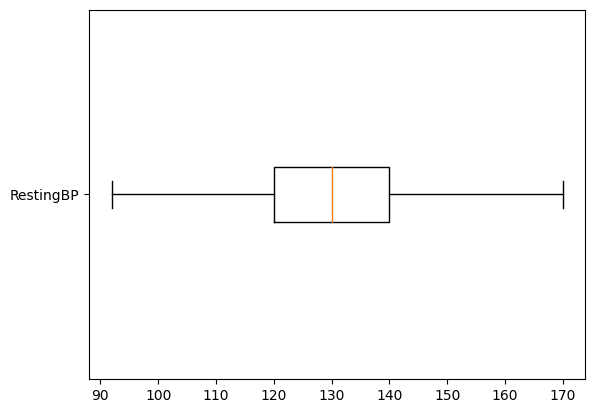

In [20]:
data = df['RestingBP'].tolist() # 取得 'price' 列的數據，並轉換為列表格式
plt.boxplot(data, labels=['RestingBP'], vert=False) # 繪製相形圖

此箱型圖落於90~170間，並且可觀察到大多數值都聚集於120~140間，並沒有明顯正偏的現象，且並沒有存在離群值

# 3.特徵相關性分析
##### (1)相關係數熱度圖
接下來透過相關係數熱度突來觀察各特徵間的相關性，並可利用相關性較高的數值來進行線性回歸，以下式相關係數熱度圖的實作:

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'ChestPainType'),
 Text(3.5, 0, 'RestingBP'),
 Text(4.5, 0, 'Cholesterol'),
 Text(5.5, 0, 'FastingBS'),
 Text(6.5, 0, 'RestingECG'),
 Text(7.5, 0, 'MaxHR'),
 Text(8.5, 0, 'ExerciseAngina'),
 Text(9.5, 0, 'Oldpeak'),
 Text(10.5, 0, 'ST_Slope'),
 Text(11.5, 0, 'HeartDisease')]

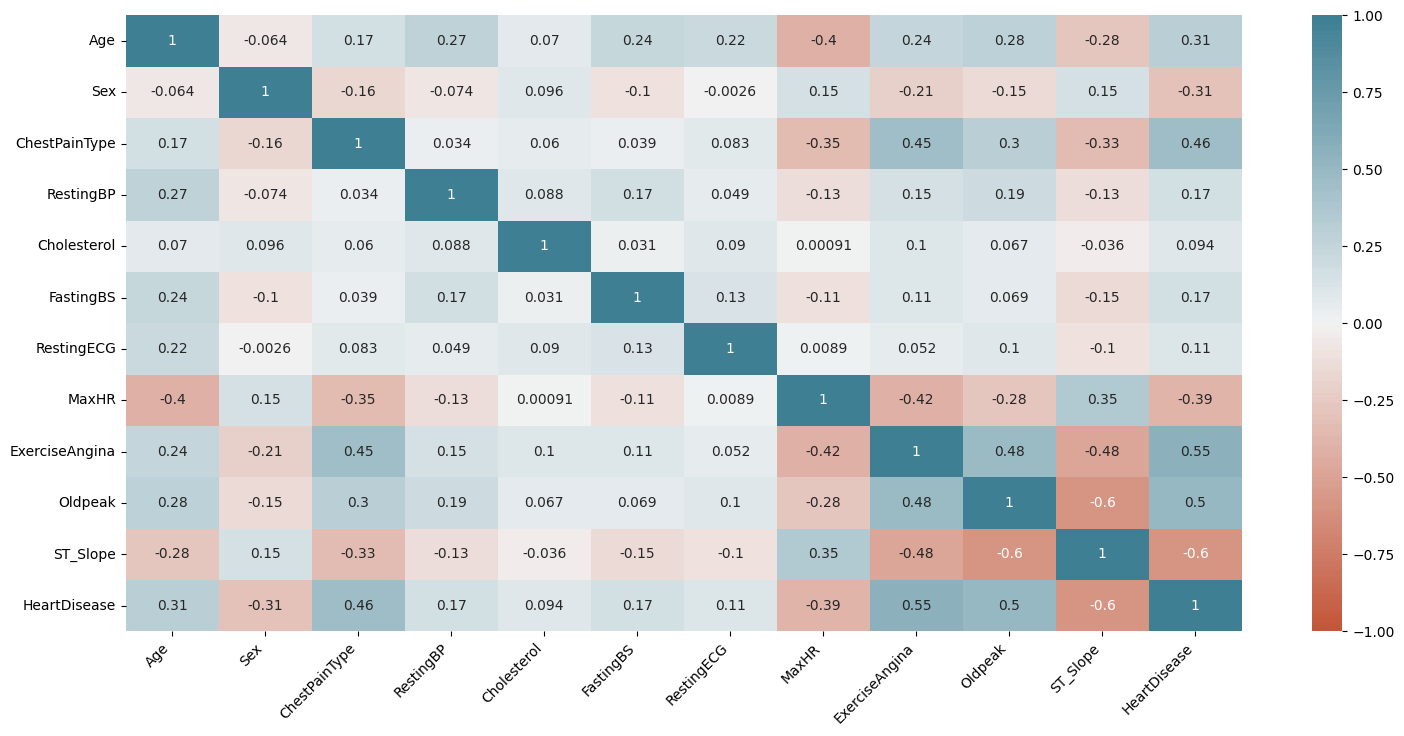

In [21]:
corr = df.loc[:, :].corr()
plt.subplots(figsize=(18, 8))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


##### (2) 與心臟病有正相關的特徵值所占比率

In [22]:
df[['ChestPainType','HeartDisease']].groupby(['ChestPainType'], as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,ChestPainType,HeartDisease
3,3,0.731563
0,0,0.358974
2,2,0.269939
1,1,0.112500


In [23]:
df[['Oldpeak','HeartDisease']].groupby(['Oldpeak'], as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,Oldpeak,HeartDisease
18,1.7,1.000000
22,2.1,1.000000
33,3.4,1.000000
32,3.2,1.000000
31,3.1,1.000000
29,2.9,1.000000
28,2.8,1.000000
26,2.5,1.000000
23,2.2,1.000000
35,3.6,1.000000


In [24]:
df[['ExerciseAngina','HeartDisease']].groupby(['ExerciseAngina'], as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,ExerciseAngina,HeartDisease
1,1,0.816794
0,0,0.250569


In [25]:
df[['RestingECG','HeartDisease']].groupby(['RestingECG'], as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,RestingECG,HeartDisease
1,1,0.565217
2,2,0.527273
0,0,0.408551


##### (3)各欄位有無心臟病時的資料分析

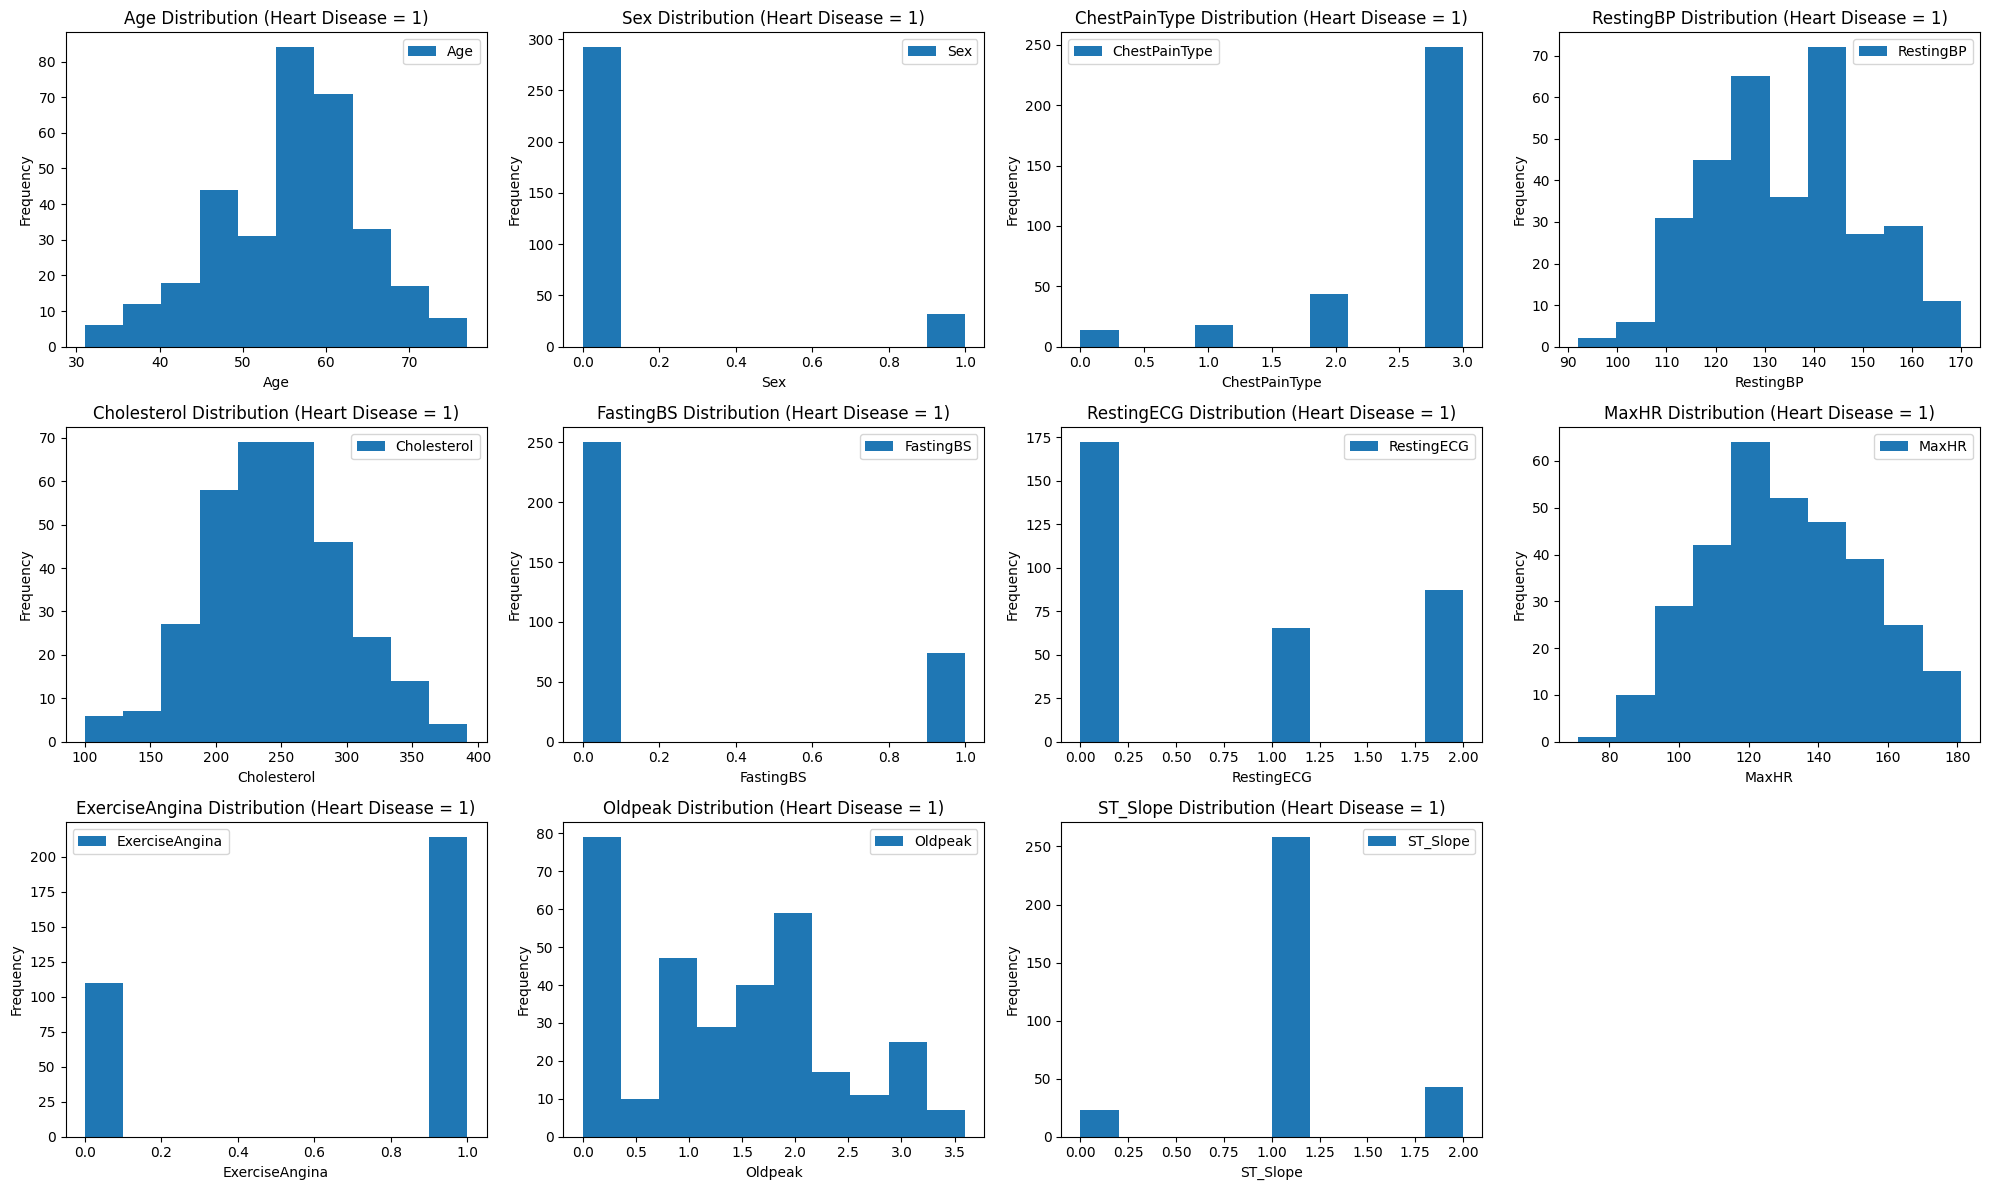

In [26]:
# 定義要查看的欄位列表（除了 'HeartDisease' 欄位）
columns_to_visualize = df.columns[df.columns != 'HeartDisease']

num_columns = len(columns_to_visualize)
num_rows = (num_columns + 3) // 4  

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4*num_rows))

# 使用迴圈繪製每個欄位的圖表
for i, column in enumerate(columns_to_visualize):
    ax = axes[i // 4, i % 4]
    # 僅繪製 HeartDisease=1 的資料
    df[df['HeartDisease'] == 1][column].plot(kind='hist', ax=ax, legend=True)
    ax.set_title(f'{column} Distribution (Heart Disease = 1)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if num_columns % 4 != 0:
    for j in range(num_columns % 4, 4):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()

plt.show()

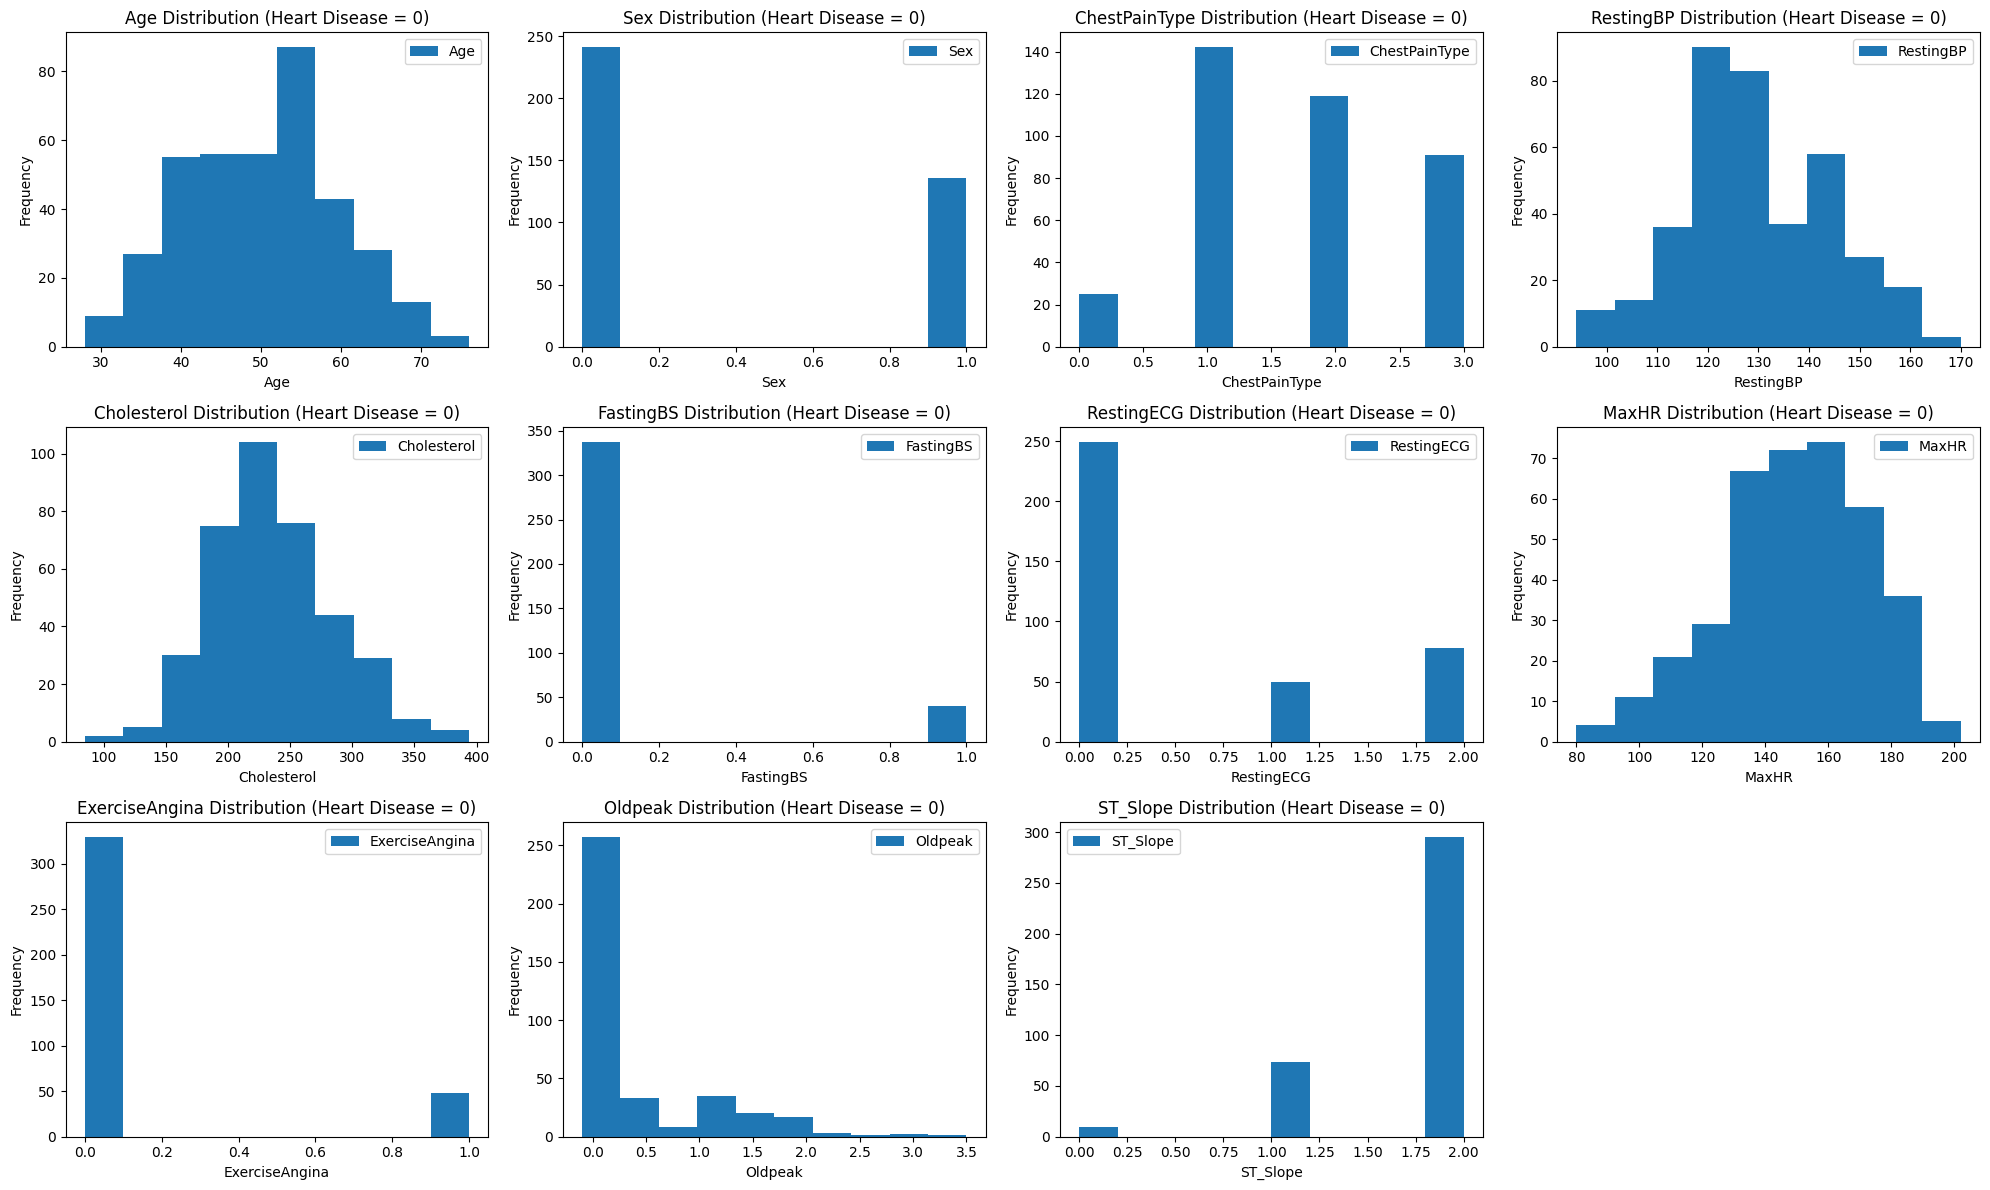

In [27]:
# 定義要查看的欄位列表（除了 'HeartDisease' 欄位）
columns_to_visualize = df.columns[df.columns != 'HeartDisease']

num_columns = len(columns_to_visualize)
num_rows = (num_columns + 3) // 4  

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4*num_rows))

# 使用迴圈繪製每個欄位的圖表
for i, column in enumerate(columns_to_visualize):
    ax = axes[i // 4, i % 4]
    # 僅繪製 HeartDisease=0 的資料
    df[df['HeartDisease'] == 0][column].plot(kind='hist', ax=ax, legend=True)
    ax.set_title(f'{column} Distribution (Heart Disease = 0)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if num_columns % 4 != 0:
    for j in range(num_columns % 4, 4):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()

plt.show()

# 4.資料分割與建置4個分類模型(1. Logistic regression、2. SVM、3. Random forest、4. KNN)
##### 將dataset以80:20(訓練集:測試集)的比例切割，並使用表格查看數據集(y)、訓練集(y_train)與測試集(y_test)的類別比例

In [28]:
from sklearn.model_selection import train_test_split

# 去除不需要的特徵
heartdf = df.drop(['HeartDisease'],axis=1)
X = heartdf

dfColumsName = df.columns
y = df['HeartDisease']

# 訓練集與測試集比例為80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=52)
# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat([y.value_counts(), 
                      y_train.value_counts(), 
                      y_test.value_counts()], axis=1)
df_count.columns = ['y', 'y_train', 'y_test']
df_count.head()

,y,y_train,y_test
HeartDisease,,,
0,377,303,74
1,324,257,67


### I. 進行logistic regression(OvR)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 定義要嘗試的C參數範圍
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 建立Logistic Regression模型
logit = LogisticRegression(max_iter=1000)

# 使用網格搜尋進行參數優化
grid_search = GridSearchCV(logit, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 印出最佳的C參數值和對應的交叉驗證準確率
print("Best C:", grid_search.best_params_['C'])

Best C: 0.1


In [31]:
from sklearn.metrics import classification_report
logit = LogisticRegression(C=10, max_iter=1000)
# 將模型擬合到訓練數據上
logit.fit(X_train, y_train)
# 產生分類報告
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.84      0.96      0.90        67

    accuracy                           0.89       141
   macro avg       0.90      0.90      0.89       141
weighted avg       0.90      0.89      0.89       141



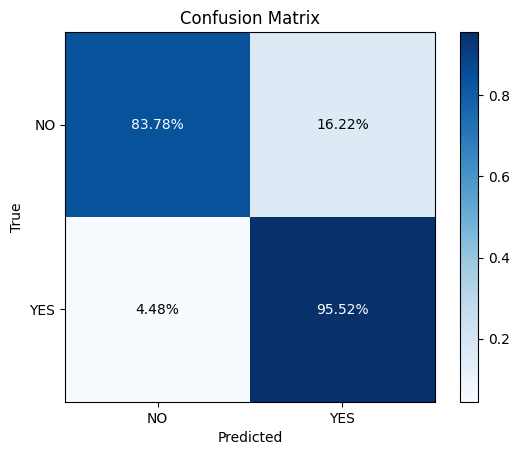

In [32]:
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 轉換成百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 定義類別標籤
class_names = ['NO', 'YES']

# 繪製混淆矩陣圖表
plt.imshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# 在每個格子中顯示百分比
thresh = cm_percentage.max() / 2.0
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        plt.text(j, i, f'{cm_percentage[i, j]:.2%}', ha='center', va='center',
                 color='white' if cm_percentage[i, j] > thresh else 'black')

plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

# 進行 k 次交叉驗證(default k=5)
cvs = cross_val_score(logit, X_test, y_test, scoring='accuracy')
print(cvs, '\n', cvs.mean())

[0.82758621 0.82142857 0.78571429 0.89285714 0.82142857] 
 0.8298029556650246


In [34]:
cvs = cross_val_score(logit, X_test, y_test, scoring='f1')
print(cvs, '\n', cvs.mean())

[0.83870968 0.82758621 0.76923077 0.89655172 0.8       ] 
 0.8264156755369214


### II. SVM


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

# 建立 SVM 分類器，設定最大回合數以增加收斂機會
svm = LinearSVC(max_iter=1500)
svm.fit(X_train_std, y_train)

from sklearn.metrics import classification_report
# 產生分類報告
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.84      0.96      0.90        67

    accuracy                           0.89       141
   macro avg       0.90      0.90      0.89       141
weighted avg       0.90      0.89      0.89       141



In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=5, gamma=.01, probability=True)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        74
           1       0.86      0.97      0.91        67

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.92      0.91      0.91       141



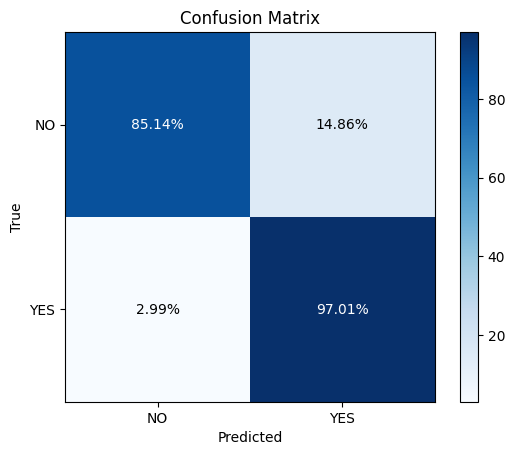

In [39]:
# 使用測試集進行預測
y_pred = svm.predict(X_test_std)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 計算每個格子中的百分比
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100

# 繪製混淆矩陣圖表
plt.imshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['NO', 'YES'])
plt.yticks([0, 1], ['NO', 'YES'])


for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j:  
            color = 'black'
        else:  
            color = 'white'
        plt.text(j, i, f'{cm_percentage[i, j]:.2f}%', ha='center', va='center', color=color)

plt.show()

### III. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        74
           1       0.90      0.90      0.90        67

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141



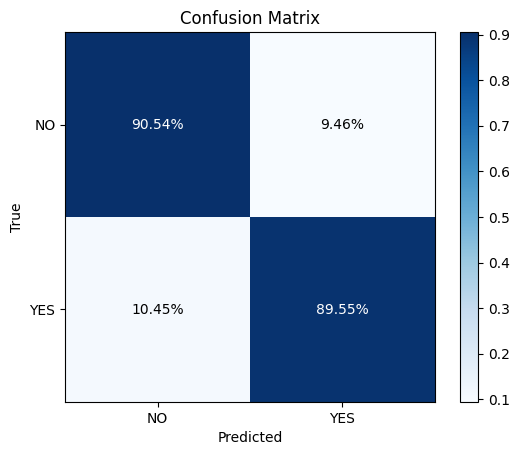

In [42]:

cm = confusion_matrix(y_test, y_pred)

# 轉換成百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 定義類別標籤
class_names = ['NO', 'YES']

# 繪製混淆矩陣圖表
plt.imshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# 在每個格子中顯示百分比
thresh = cm_percentage.max() / 2.0
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        plt.text(j, i, f'{cm_percentage[i, j]:.2%}', ha='center', va='center',
                 color='white' if cm_percentage[i, j] > thresh else 'black')

plt.show()

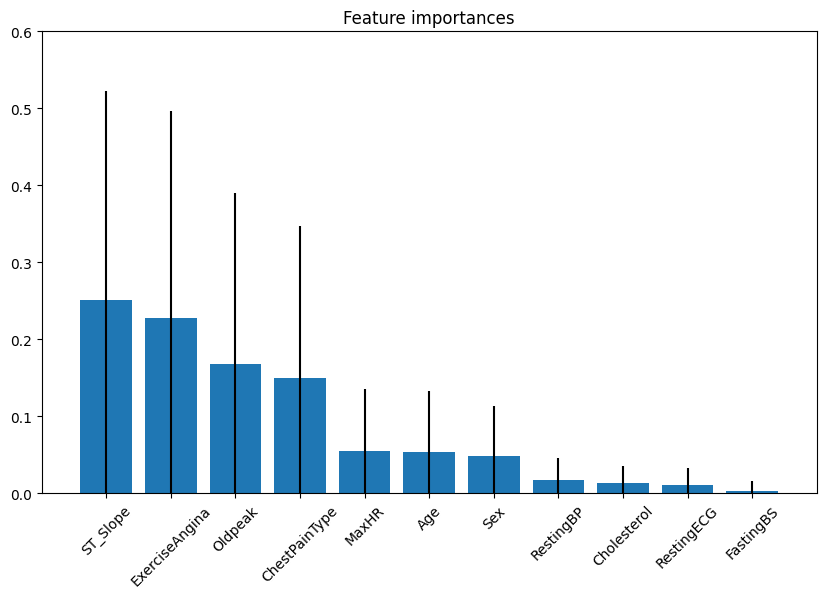

In [43]:
importances = clf.feature_importances_
std = np.std([t.feature_importances_ for t in clf.estimators_], axis=0)
idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))  
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[idx], 
        yerr=std[idx], align="center")
plt.xticks(range(X.shape[1]), labels=X.columns[idx])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.6])
plt.xticks(range(X.shape[1]), labels=X.columns[idx], rotation=45)

plt.show()

In [44]:
from sklearn.feature_selection import SelectFromModel

# 建立特徵選取器，門檻值預設為重要性的平均值
selector = SelectFromModel(clf)
selector.fit(X_train, y_train)
print('門檻值 =', selector.threshold_)
print('特徵遮罩：', selector.get_support())


門檻值 = 0.09090909090909091
特徵遮罩： [False False  True False False False False False  True  True  True]


In [45]:

# 選出新特徵，重新訓練隨機森林
X_train_new = selector.transform(X_train)
clf.fit(X_train_new, y_train)

X_test_new = selector.transform(X_test)
y_pred = clf.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        74
           1       0.85      0.91      0.88        67

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



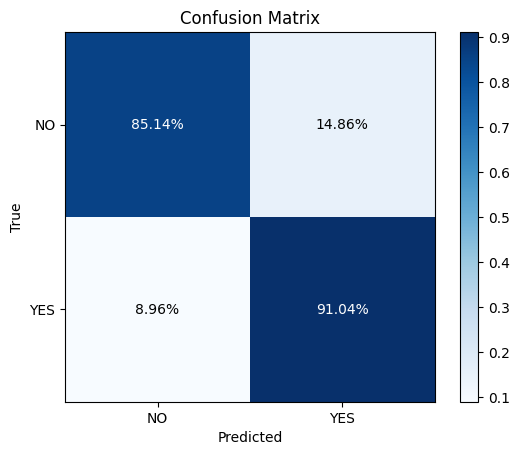

In [46]:

cm = confusion_matrix(y_test, y_pred)

# 轉換成百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 定義類別標籤
class_names = ['NO', 'YES']

# 繪製混淆矩陣圖表
plt.imshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# 在每個格子中顯示百分比
thresh = cm_percentage.max() / 2.0
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        plt.text(j, i, f'{cm_percentage[i, j]:.2%}', ha='center', va='center',
                 color='white' if cm_percentage[i, j] > thresh else 'black')

plt.show()

### IV.K-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 20)  # 定義一系列的k值

error_means = []  # 存每個k值對應的平均錯誤

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 交叉驗證計算模型的平均錯誤
    error_mean = 1 - scores.mean()  # 計算平均錯誤
    error_means.append(error_mean)  # 加到列表中

# 找出平均錯誤最小的k值
best_k = k_values[error_means.index(min(error_means))]
print("Best k value:", best_k)

Best k value: 4


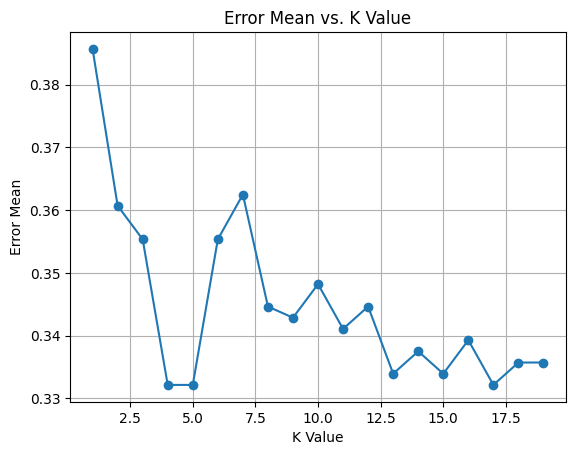

In [49]:
plt.plot(k_values, error_means, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Mean')
plt.title('Error Mean vs. K Value')
plt.grid(True)
plt.show()


In [51]:

from sklearn.metrics import confusion_matrix, classification_report

# 建立KNN模型
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = knn.predict(X_test)


# 產生分類報告
report = classification_report(y_test, y_pred)

print(report)



              precision    recall  f1-score   support

           0       0.71      0.72      0.71        74
           1       0.68      0.67      0.68        67

    accuracy                           0.70       141
   macro avg       0.69      0.69      0.69       141
weighted avg       0.69      0.70      0.69       141



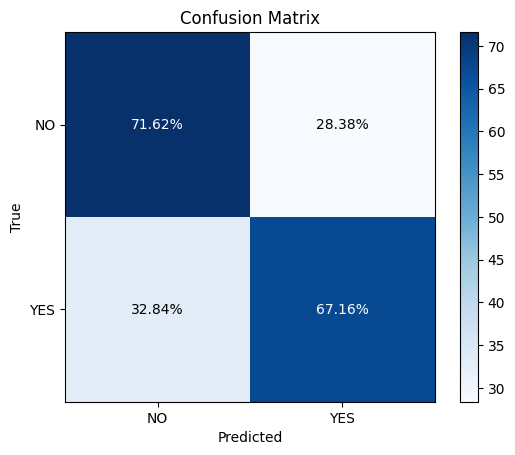

In [52]:
# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 計算每個格子中的百分比
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100

# 繪製混淆矩陣圖表
plt.imshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['NO', 'YES'])
plt.yticks([0, 1], ['NO', 'YES'])

for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j:  
            color = 'black'
        else:  
            color = 'white'
        plt.text(j, i, f'{cm_percentage[i, j]:.2f}%', ha='center', va='center', color=color)

plt.show()

# 5.綜合比較四個模型的分類結果與分析討論

上述模型的accuracy分別為:<br>
Logistic Regression(OvR):0.89<br>
SVM:0.91<br>
Random Forest:0.90<br>
KNN:0.70<br>
剩下的分析與討論放在紙本資料中